In [2]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


## Create directory

In [2]:
if not os.path.exists("Results/Figures/Figure3/Data/"):
    os.makedirs("Results/Figures/Figure3/Data/")
    
if not os.path.exists("Results/Figures/Figure3/Distance_to_Anno/"):
    os.makedirs("Results/Figures/Figure3/Distance_to_Anno/")

# Panel A + B 
A: histogram  
B: Heat map

peak options:  
1) From output   
2) From txn_df peaks  
3) CHO-specific  
4) From output but peak 1 vs others .  

Tag Options:  
1) All merged  
2) CHO-Specific

## i. Peak option 1; Tag option 1

In [3]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = "Results/merged/tags_TSS_merged"


#i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
mrna_filt = "Results/Figures/Figure3/A.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)


ID             Chr  \
2      ID=rna6;Parent=gene4;Dbxref=GeneID:100754303,G...  NW_020822366.1   
3      ID=rna10;Parent=gene6;Dbxref=GeneID:100752216,...  NW_020822366.1   
4      ID=rna11;Parent=gene6;Dbxref=GeneID:100752216,...  NW_020822366.1   
5      ID=rna12;Parent=gene6;Dbxref=GeneID:100752216,...  NW_020822366.1   
6      ID=rna13;Parent=gene7;Dbxref=GeneID:103160710,...  NW_020822366.1   
7      ID=rna14;Parent=gene8;Dbxref=GeneID:100754009,...  NW_020822366.1   
8      ID=rna15;Parent=gene10;Dbxref=GeneID:100751644...  NW_020822366.1   
9      ID=rna16;Parent=gene11;Dbxref=GeneID:100750960...  NW_020822366.1   
10     ID=rna17;Parent=gene11;Dbxref=GeneID:100750960...  NW_020822366.1   
11     ID=rna18;Parent=gene11;Dbxref=GeneID:100750960...  NW_020822366.1   
12     ID=rna22;Parent=gene13;Dbxref=GeneID:100750667...  NW_020822366.1   
13     ID=rna23;Parent=gene14;Dbxref=GeneID:100753715...  NW_020822366.1   
14     ID=rna24;Parent=gene14;Dbxref=GeneID:100753715...  NW_020822366.1   
15     ID=rna25;Parent=gene15;Dbxref=GeneID:100750379...  NW_020822366.1   
16     ID=rna26;Parent=gene16;Dbxref=GeneID:100774859...  NW_020822366.1   
17     ID=rna27;Parent=gene16;Dbxref=GeneID:100774859...  NW_020822366.1   
18     ID=rna29;Parent=gene18;Dbxref=GeneID:100756046...  NW_020822366.1   
20     ID=rna30;Parent=gene19;Dbxref=GeneID:100755750...  NW_020822366.1   
21     ID=rna33;Parent=gene21;Dbxref=GeneID:100755456...  NW_020822366.1   
22     ID=rna34;Parent=gene21;Dbxref=GeneID:100755456...  NW_020822366.1   
23     ID=rna35;Parent=gene21;Dbxref=GeneID:100755456...  NW_020822366.1   
24     ID=rna36;Parent=gene21;Dbxref=GeneID:100755456...  NW_020822366.1   
25     ID=rna37;Parent=gene23;Dbxref=GeneID:100753411...  NW_020822366.1   
26     ID=rna38;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
27     ID=rna39;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
28     ID=rna40;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
29     ID=rna41;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
30     ID=rna42;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
31     ID=rna43;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
32     ID=rna44;Parent=gene25;Dbxref=GeneID:100752812...  NW_020822366.1   
...                                                  ...             ...   
46529  ID=rna56027;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46530  ID=rna56028;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46531  ID=rna56029;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46532  ID=rna56030;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46533  ID=rna56031;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46534  ID=rna56032;Parent=gene32620;Dbxref=GeneID:113...  NW_020823819.1   
46535  ID=rna56033;Parent=gene32621;Dbxref=GeneID:113...  NW_020823819.1   
46536  ID=rna56040;Parent=gene32623;Dbxref=GeneID:113...  NW_020823819.1   
46562  ID=rna56070;Parent=gene32662;Dbxref=GeneID:113...  NW_020823848.1   
46571  ID=rna56079;Parent=gene32677;Dbxref=GeneID:113...  NW_020823856.1   
46595  ID=rna56106;Parent=gene32701;Dbxref=GeneID:107...  NW_020823876.1   
46612  ID=rna56126;Parent=gene32734;Dbxref=GeneID:100...  NW_020823898.1   
46616  ID=rna56130;Parent=gene32753;Dbxref=GeneID:113...  NW_020823908.1   
46617  ID=rna56131;Parent=gene32753;Dbxref=GeneID:113...  NW_020823908.1   
46624  ID=rna56140;Parent=gene32775;Dbxref=GeneID:113...  NW_020823928.1   
46625  ID=rna56141;Parent=gene32776;Dbxref=GeneID:113...  NW_020823928.1   
46638  ID=rna56160;Parent=gene32806;Dbxref=GeneID:103...  NW_020823954.1   
46639  ID=rna56161;Parent=gene32806;Dbxref=GeneID:103...  NW_020823954.1   
46644  ID=rna56171;Parent=gene32819;Dbxref=GeneID:113...  NW_020823970.1   
46656  ID=rna56184;Parent=gene32855;Dbxref=GeneID:113...  NW_020824001.1   
46670  ID=rna56204;Parent=gene32880;Dbxref=GeneID:113...  NW_020824030.1   
46671  ID=rna56202;Parent=

('output histogram mrna', 'Results/Figures/Figure3/A.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > 

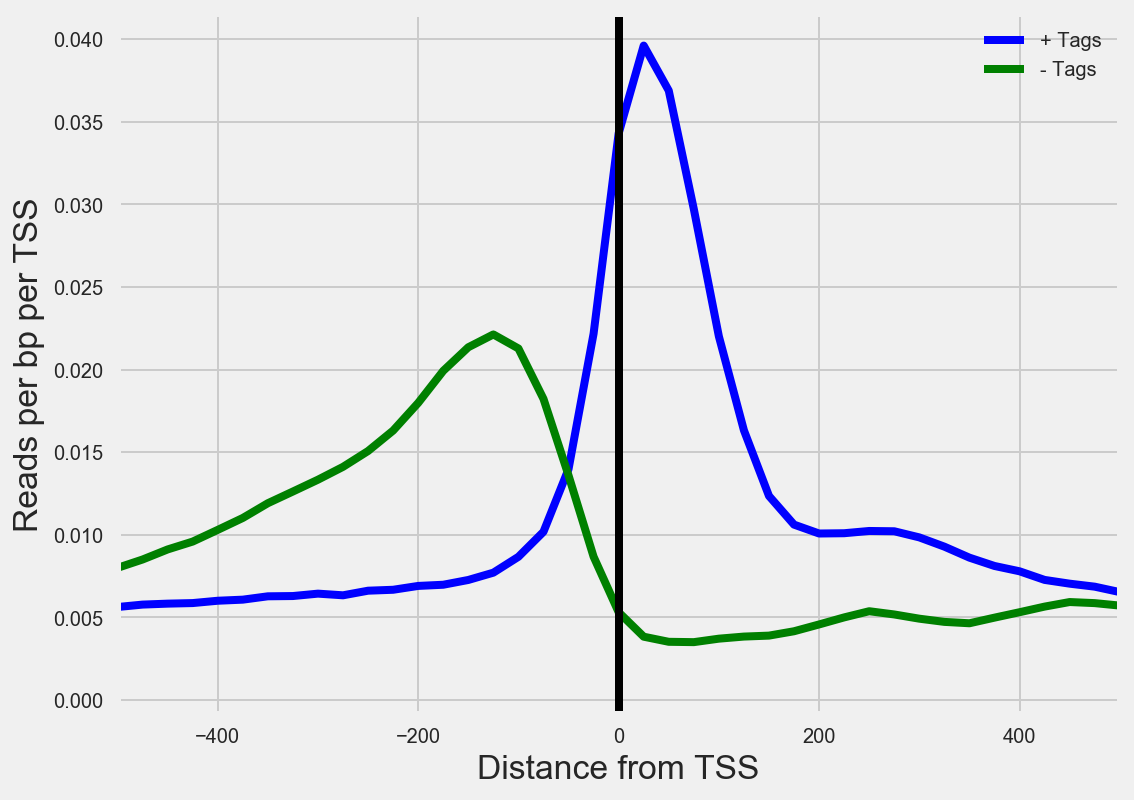

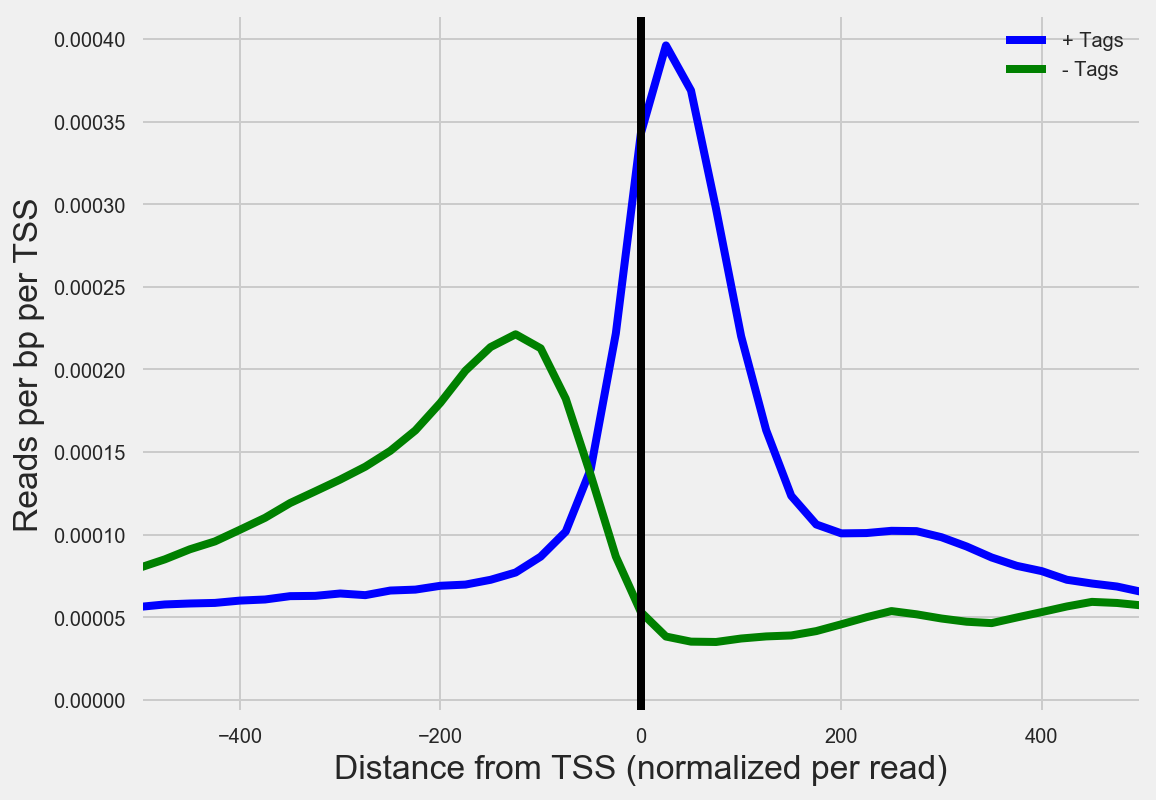

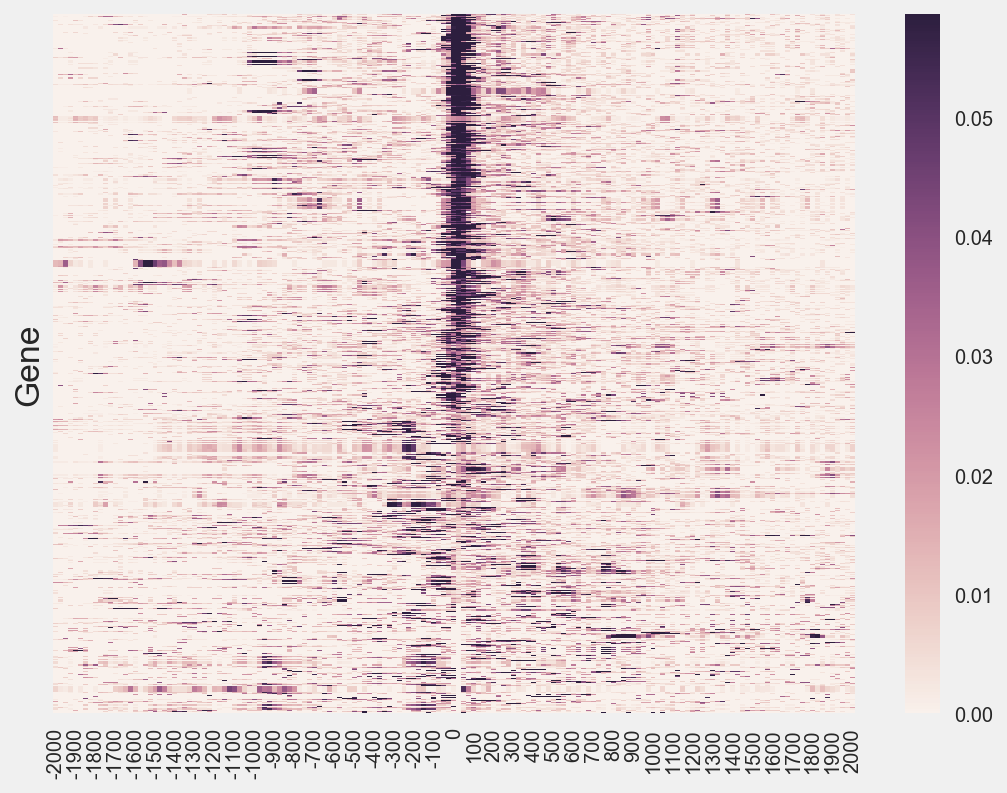

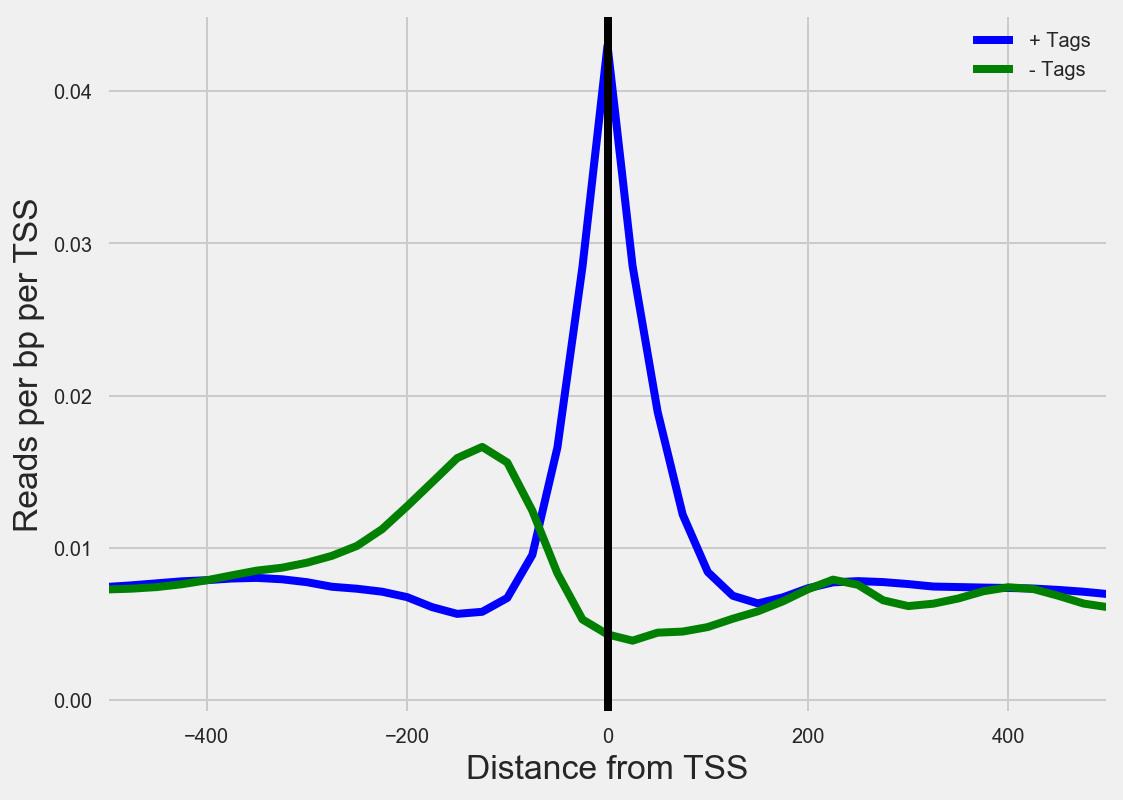

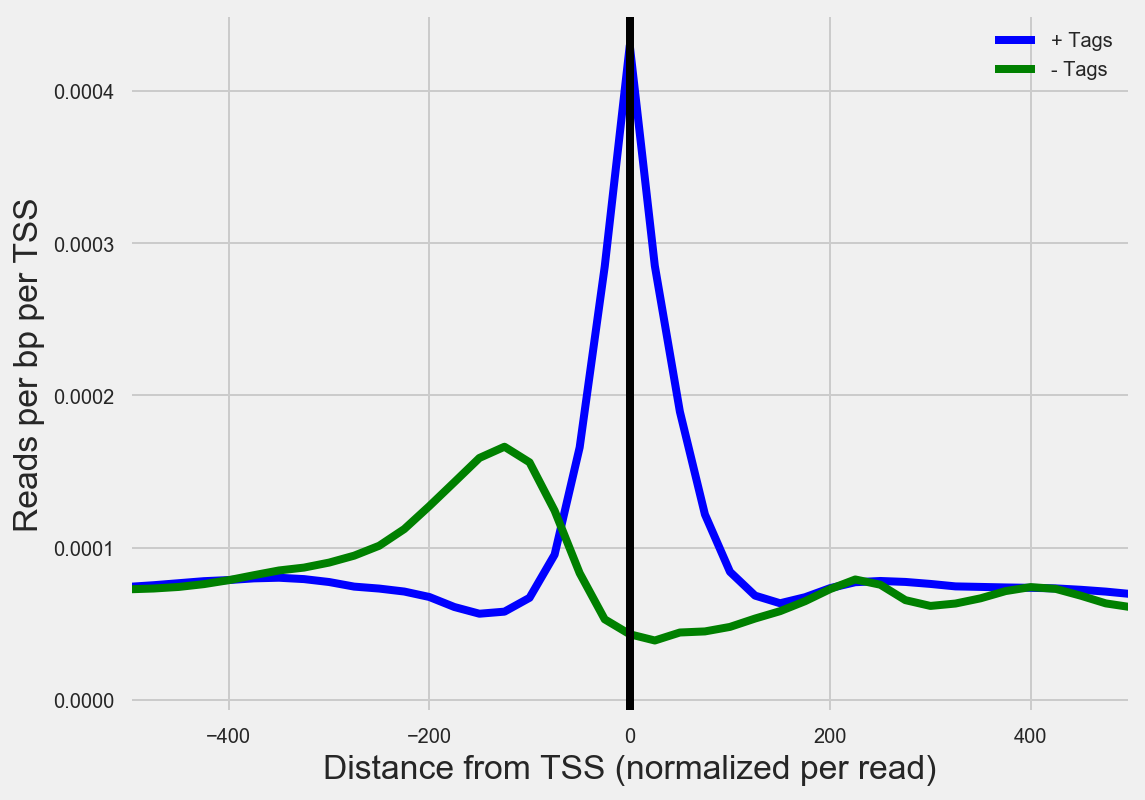

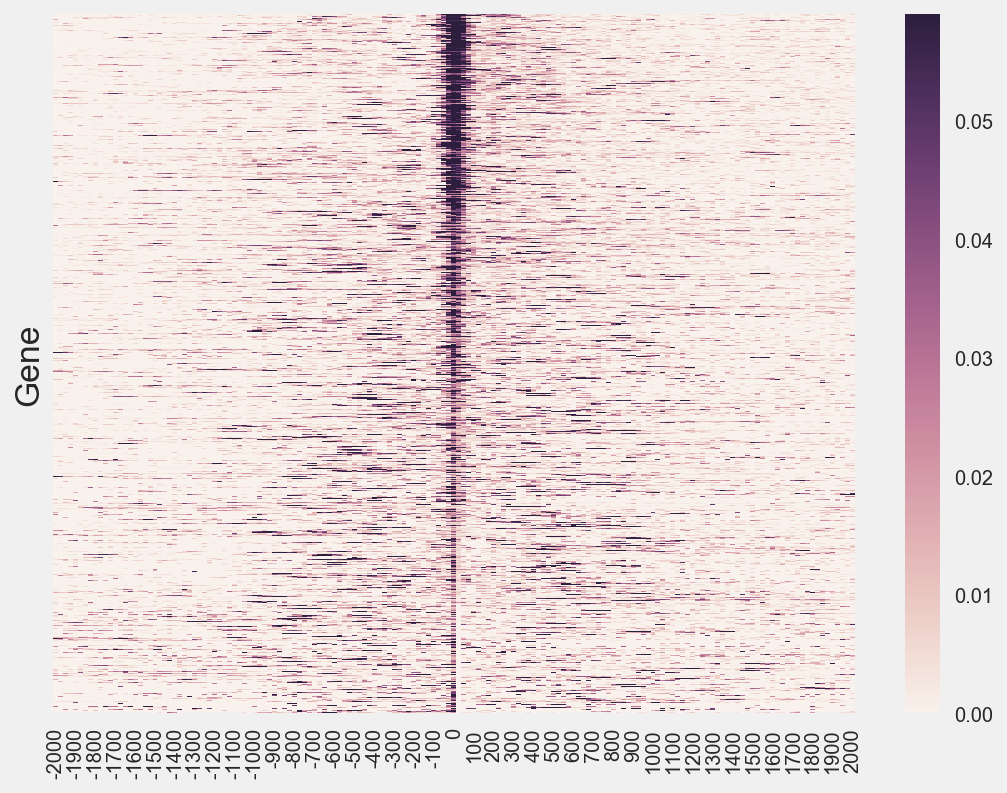

In [4]:
# Refseq 
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

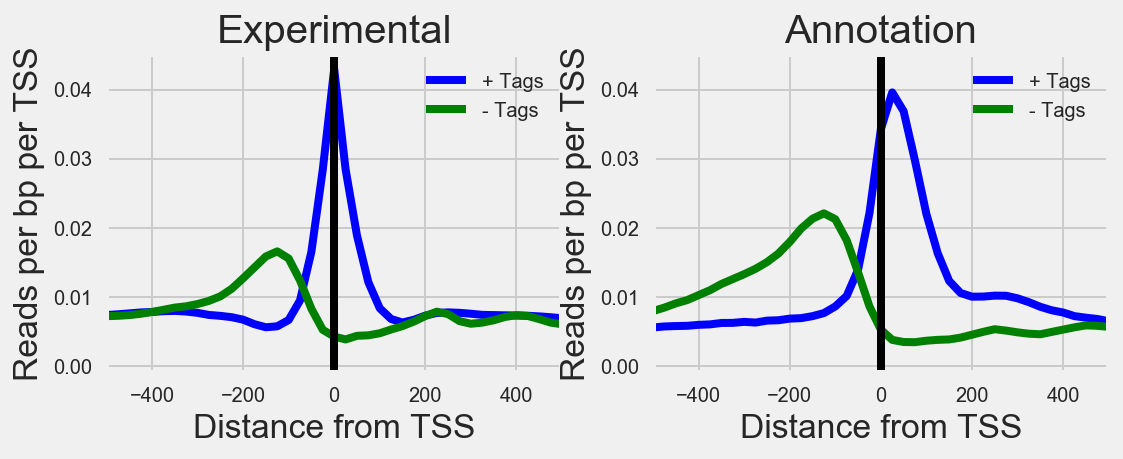

In [5]:
wrap_hist_plot([output_file_exp,
                output_file_mrna], hist_save="Results/Figures/Figure3/A.combine.png",
                    names=["Experimental","Annotation"])

## ii. Tags from CHO GRO-Cap

('output histogram mrna', 'Results/Figures/Figure3/A_ii.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/Figures/Figure3/A_ii.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/Figures/Figure3/A_ii.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriG

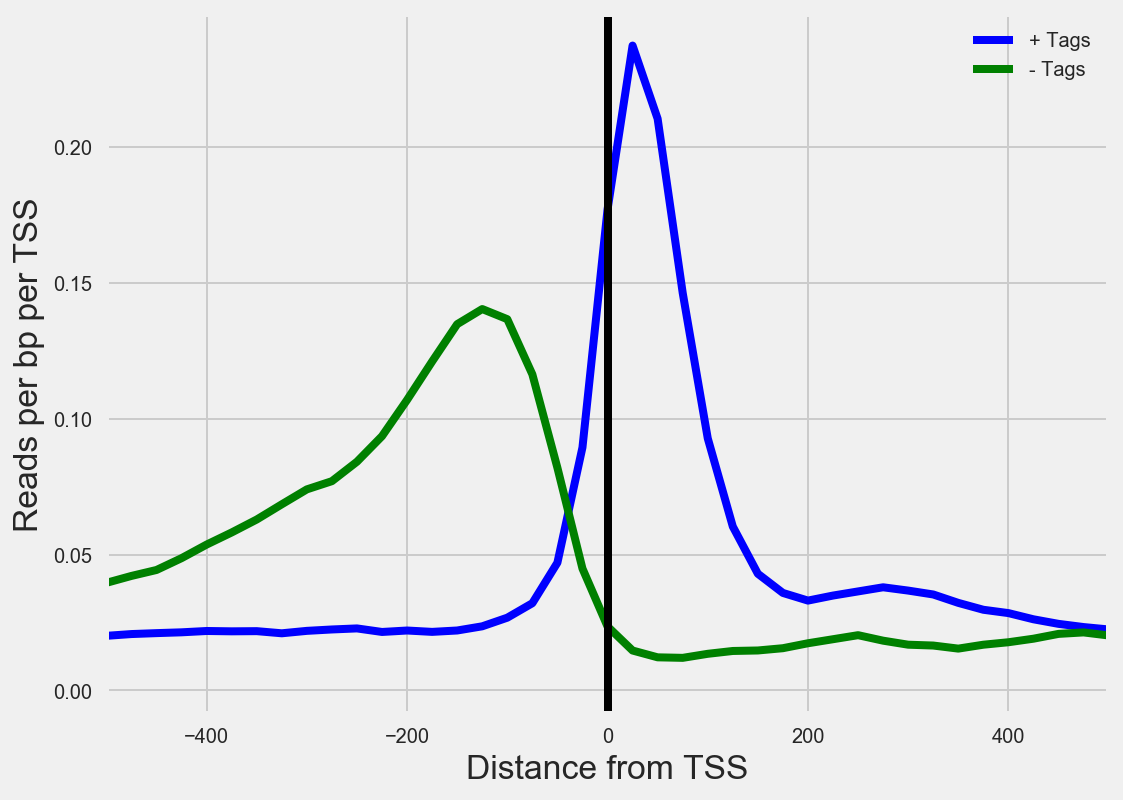

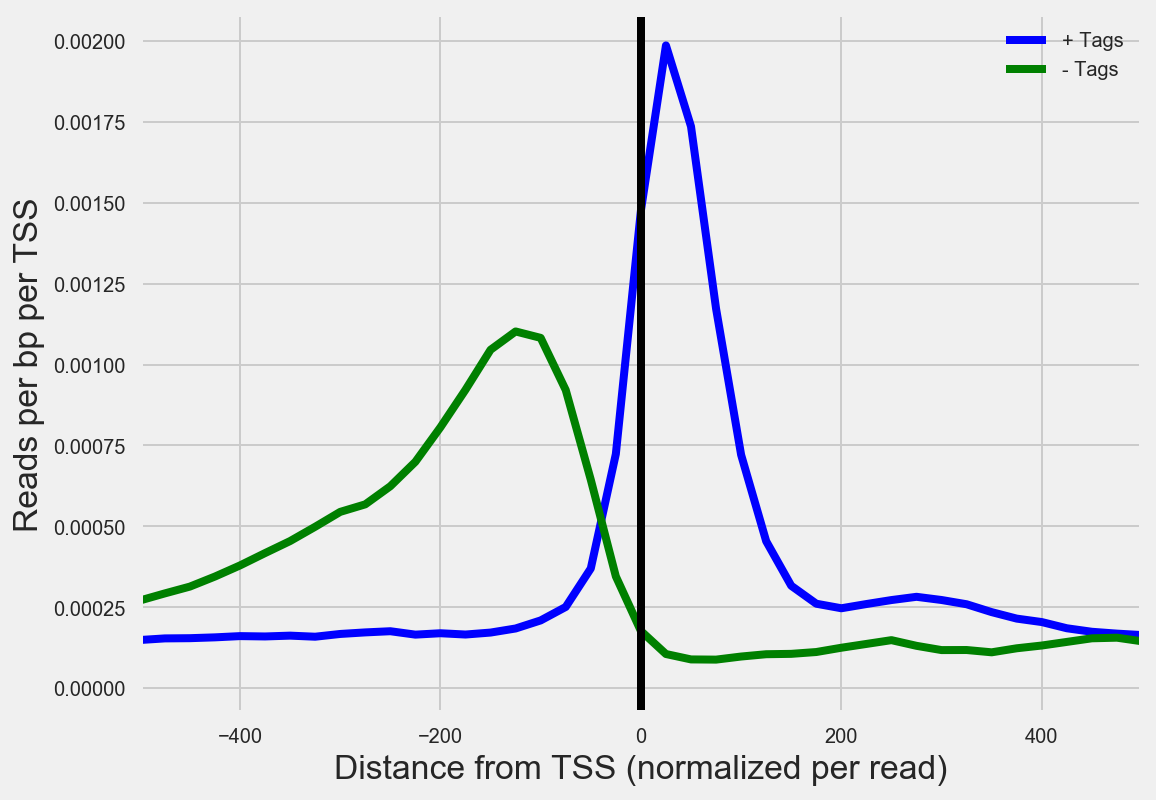

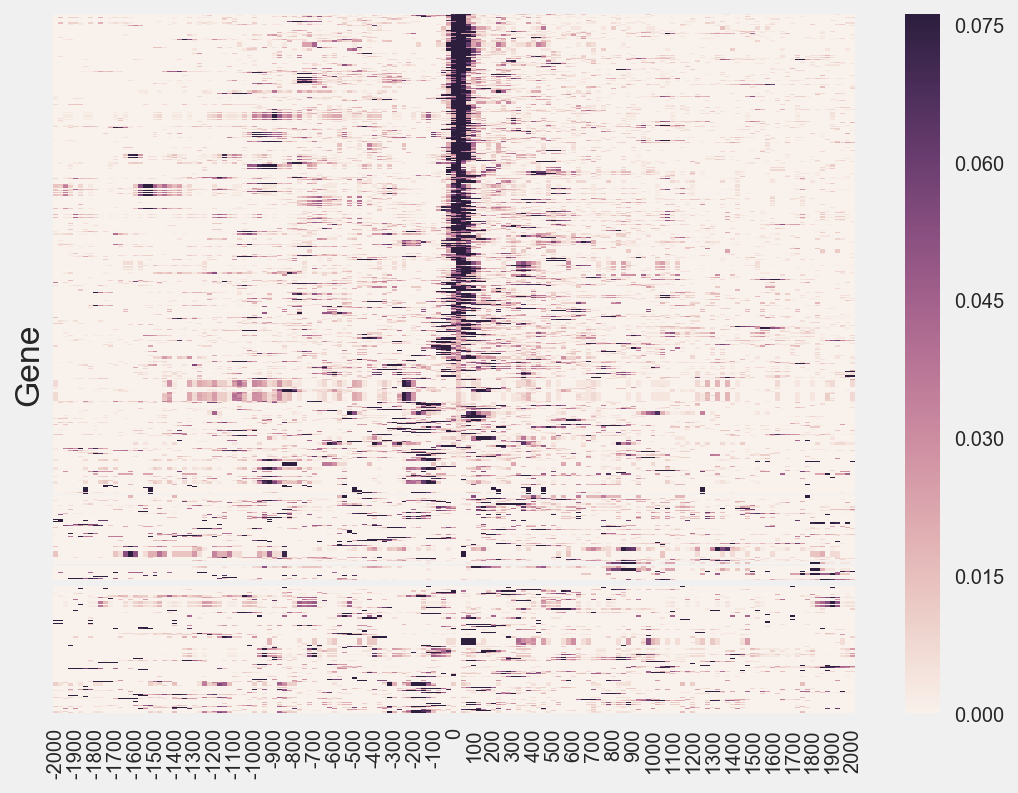

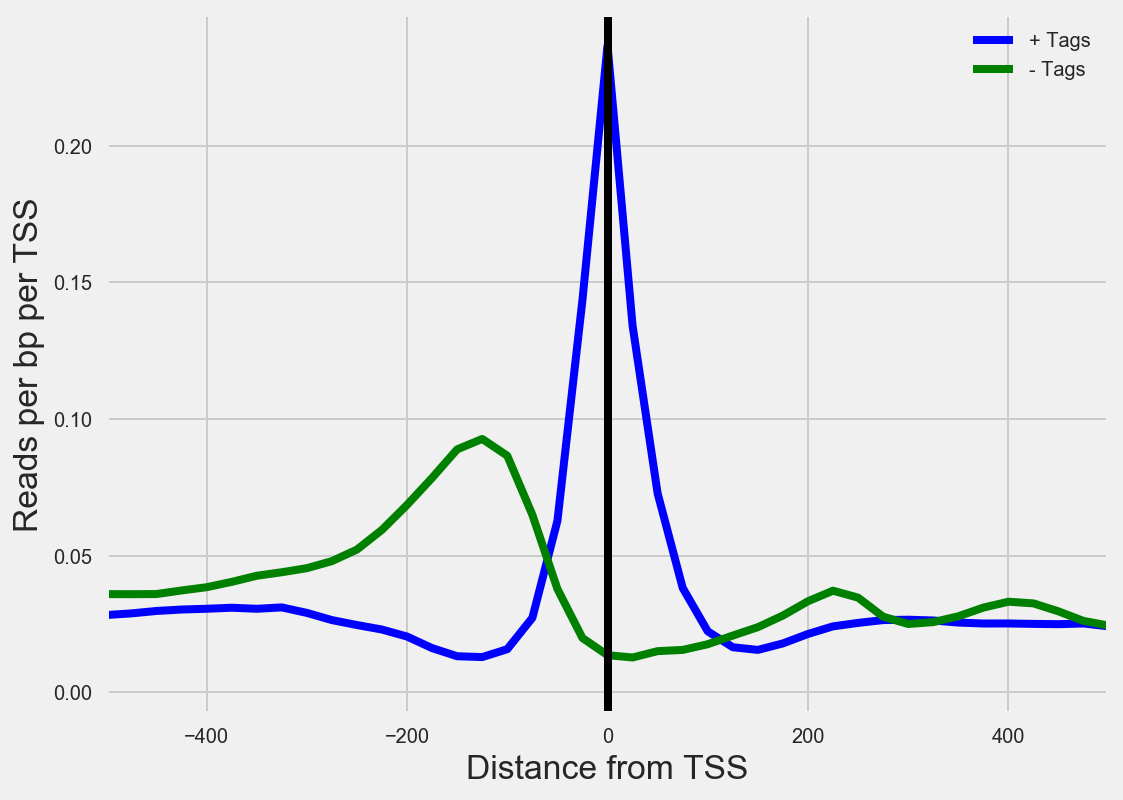

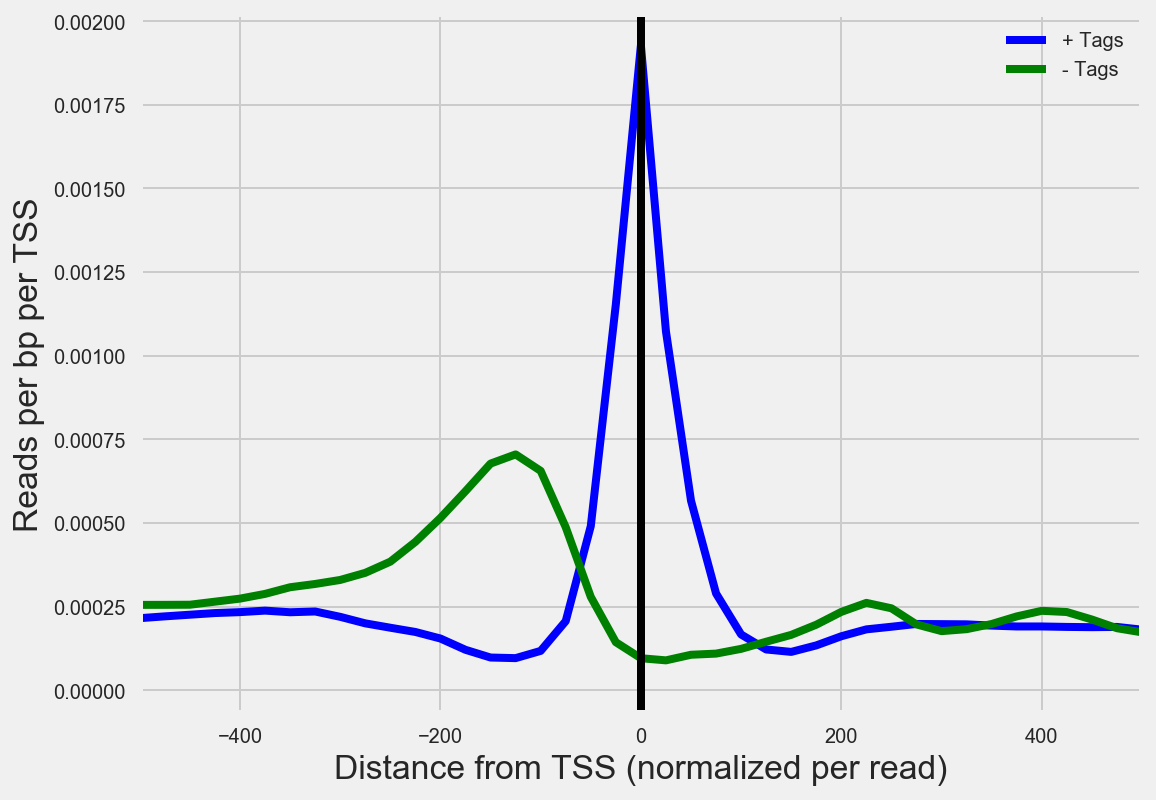

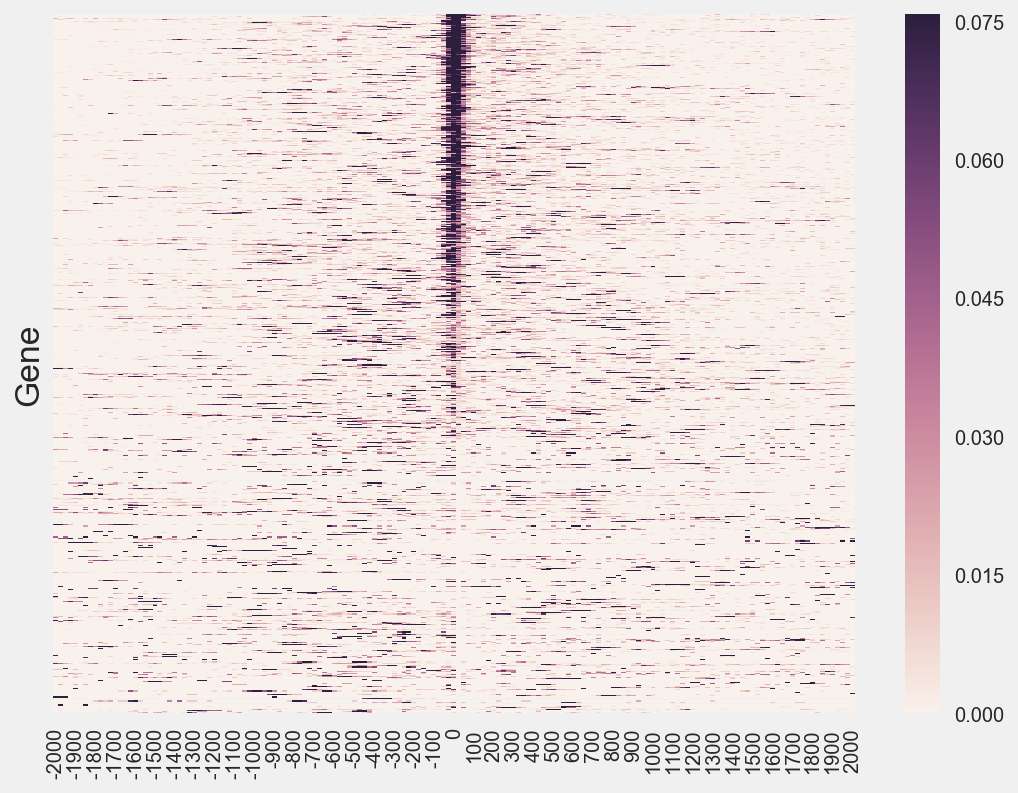

In [7]:
# Refseq 

peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = os.path.join(data_folder,"CHO/GROCap/f03_tags/trim_CHO_GROCap1")

## Create RefSeq peak file for this
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)
output_file_mrna = "Results/Figures/Figure3/A_ii.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A_ii.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

## iii. Peaks 

# C. 

## i. 

annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt


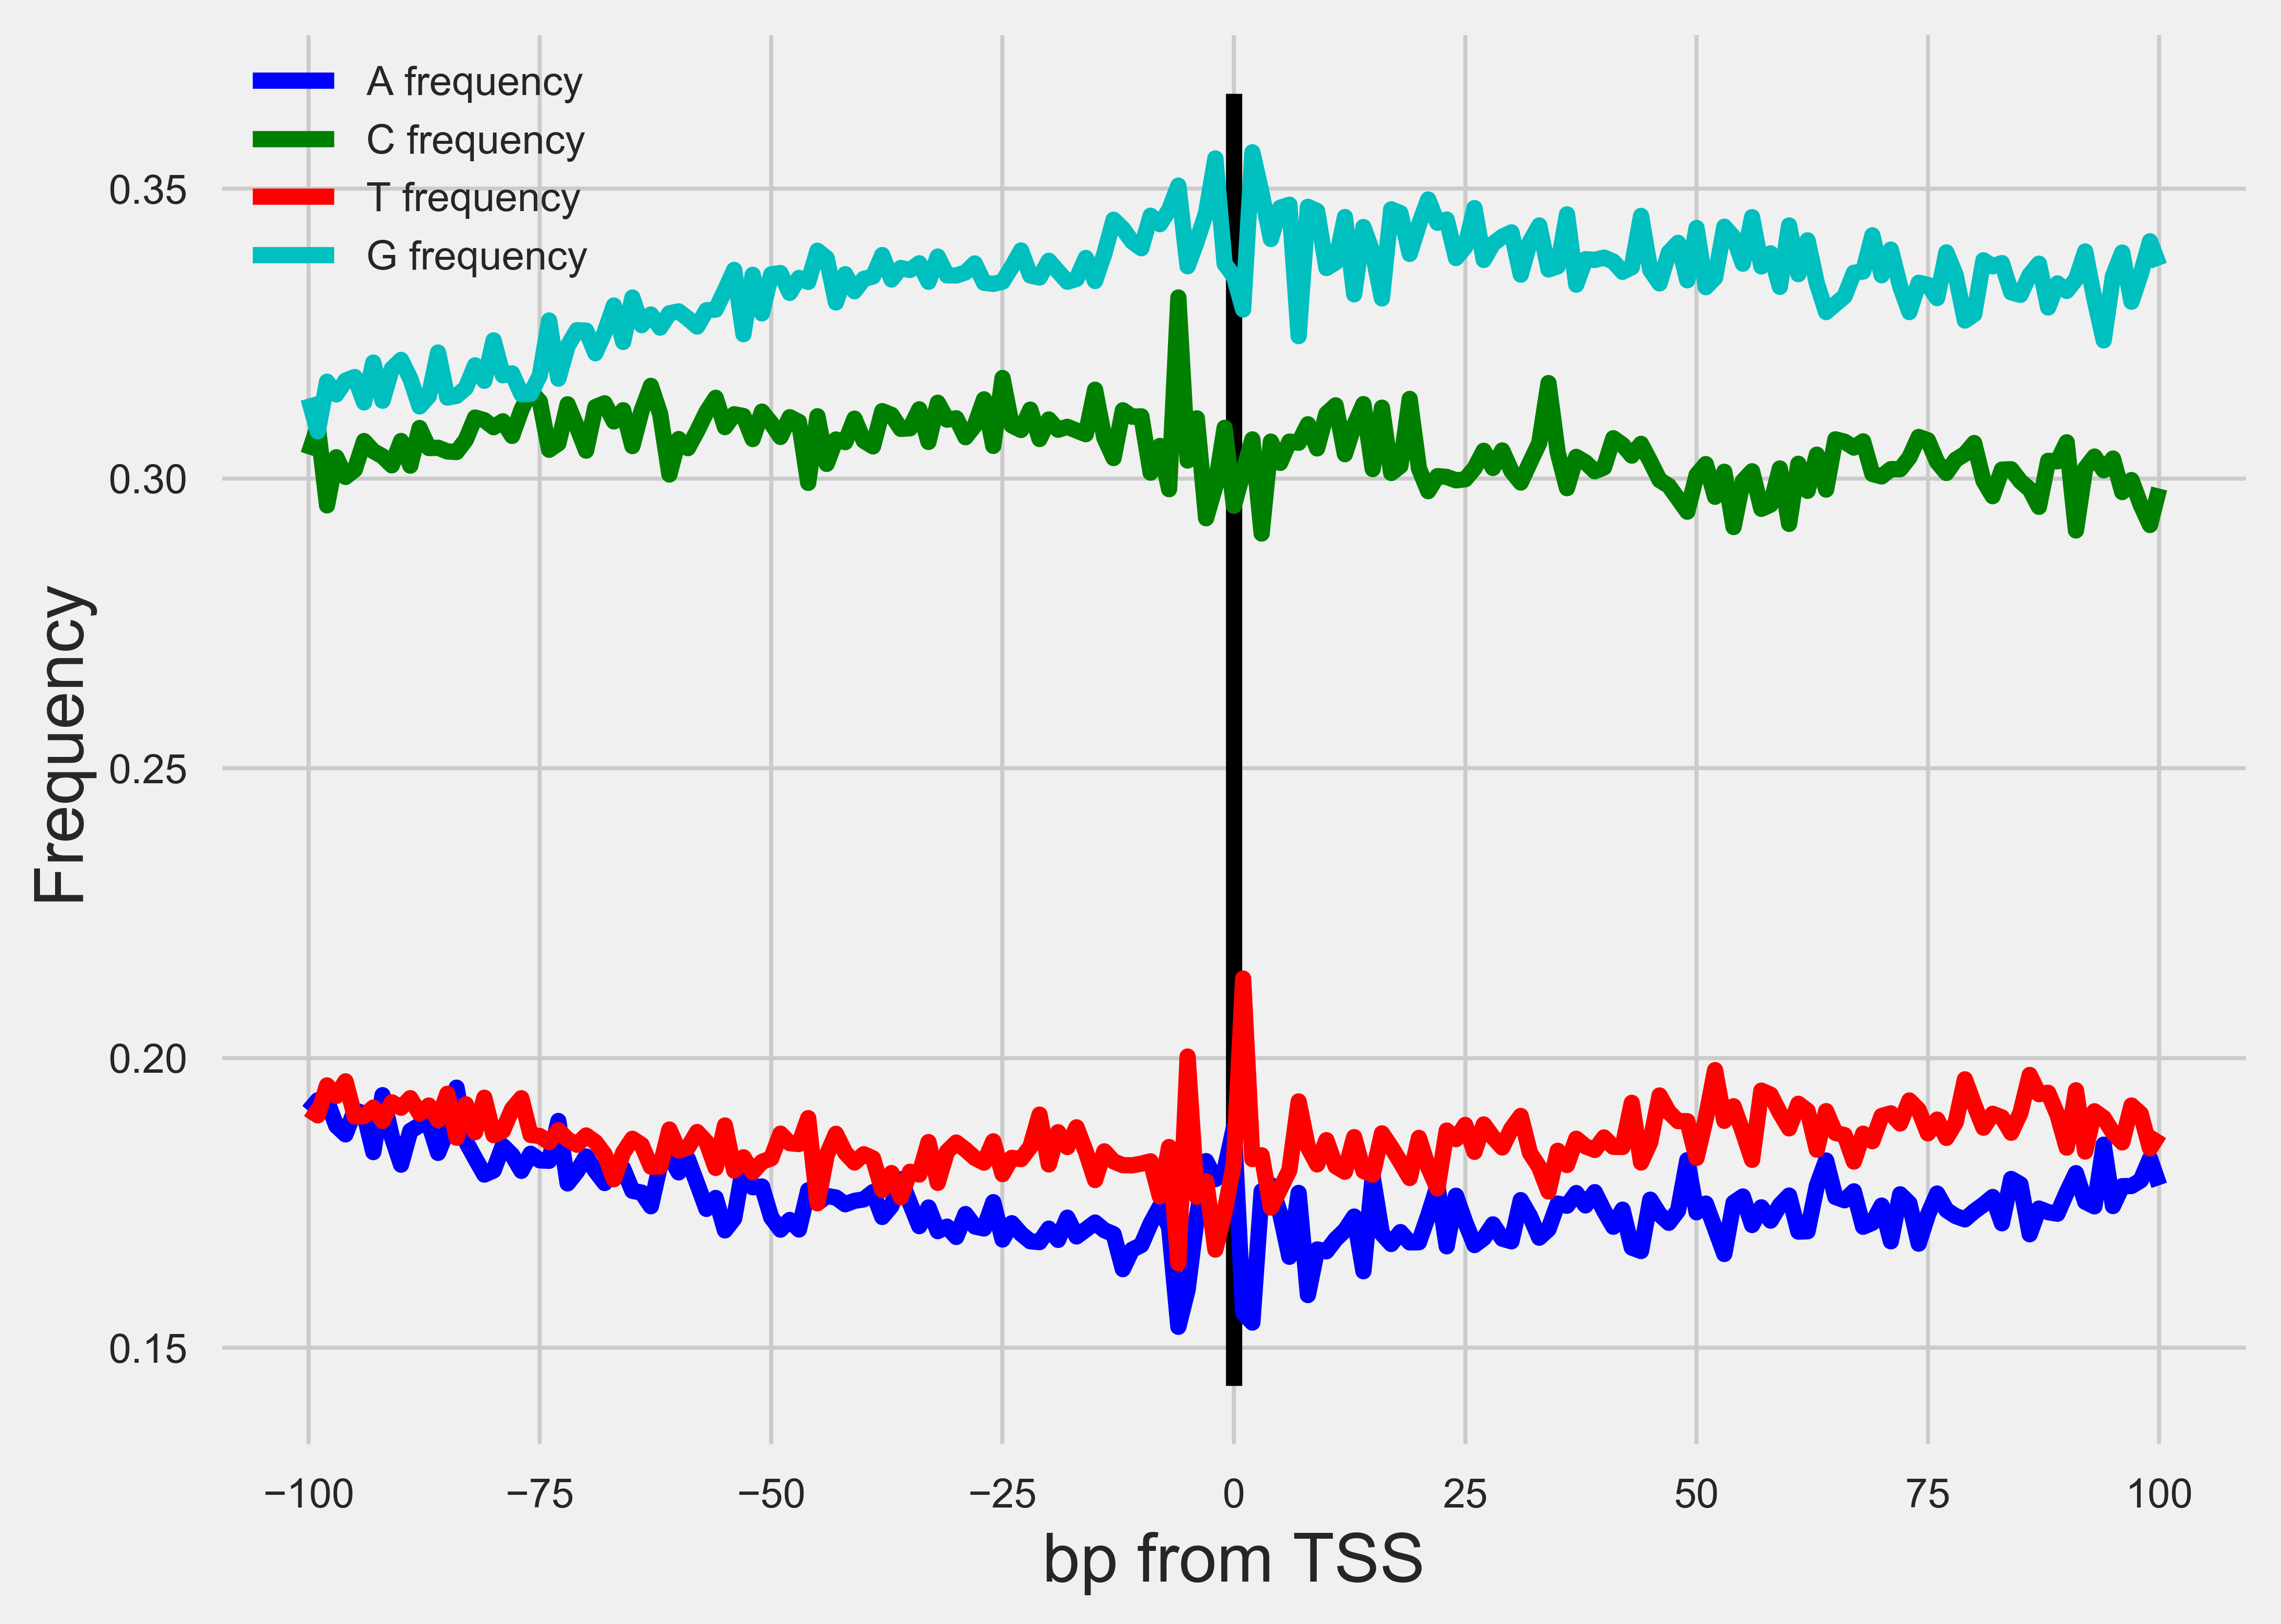

In [9]:
mrna_filt = "Results/Figures/Figure3/A.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt


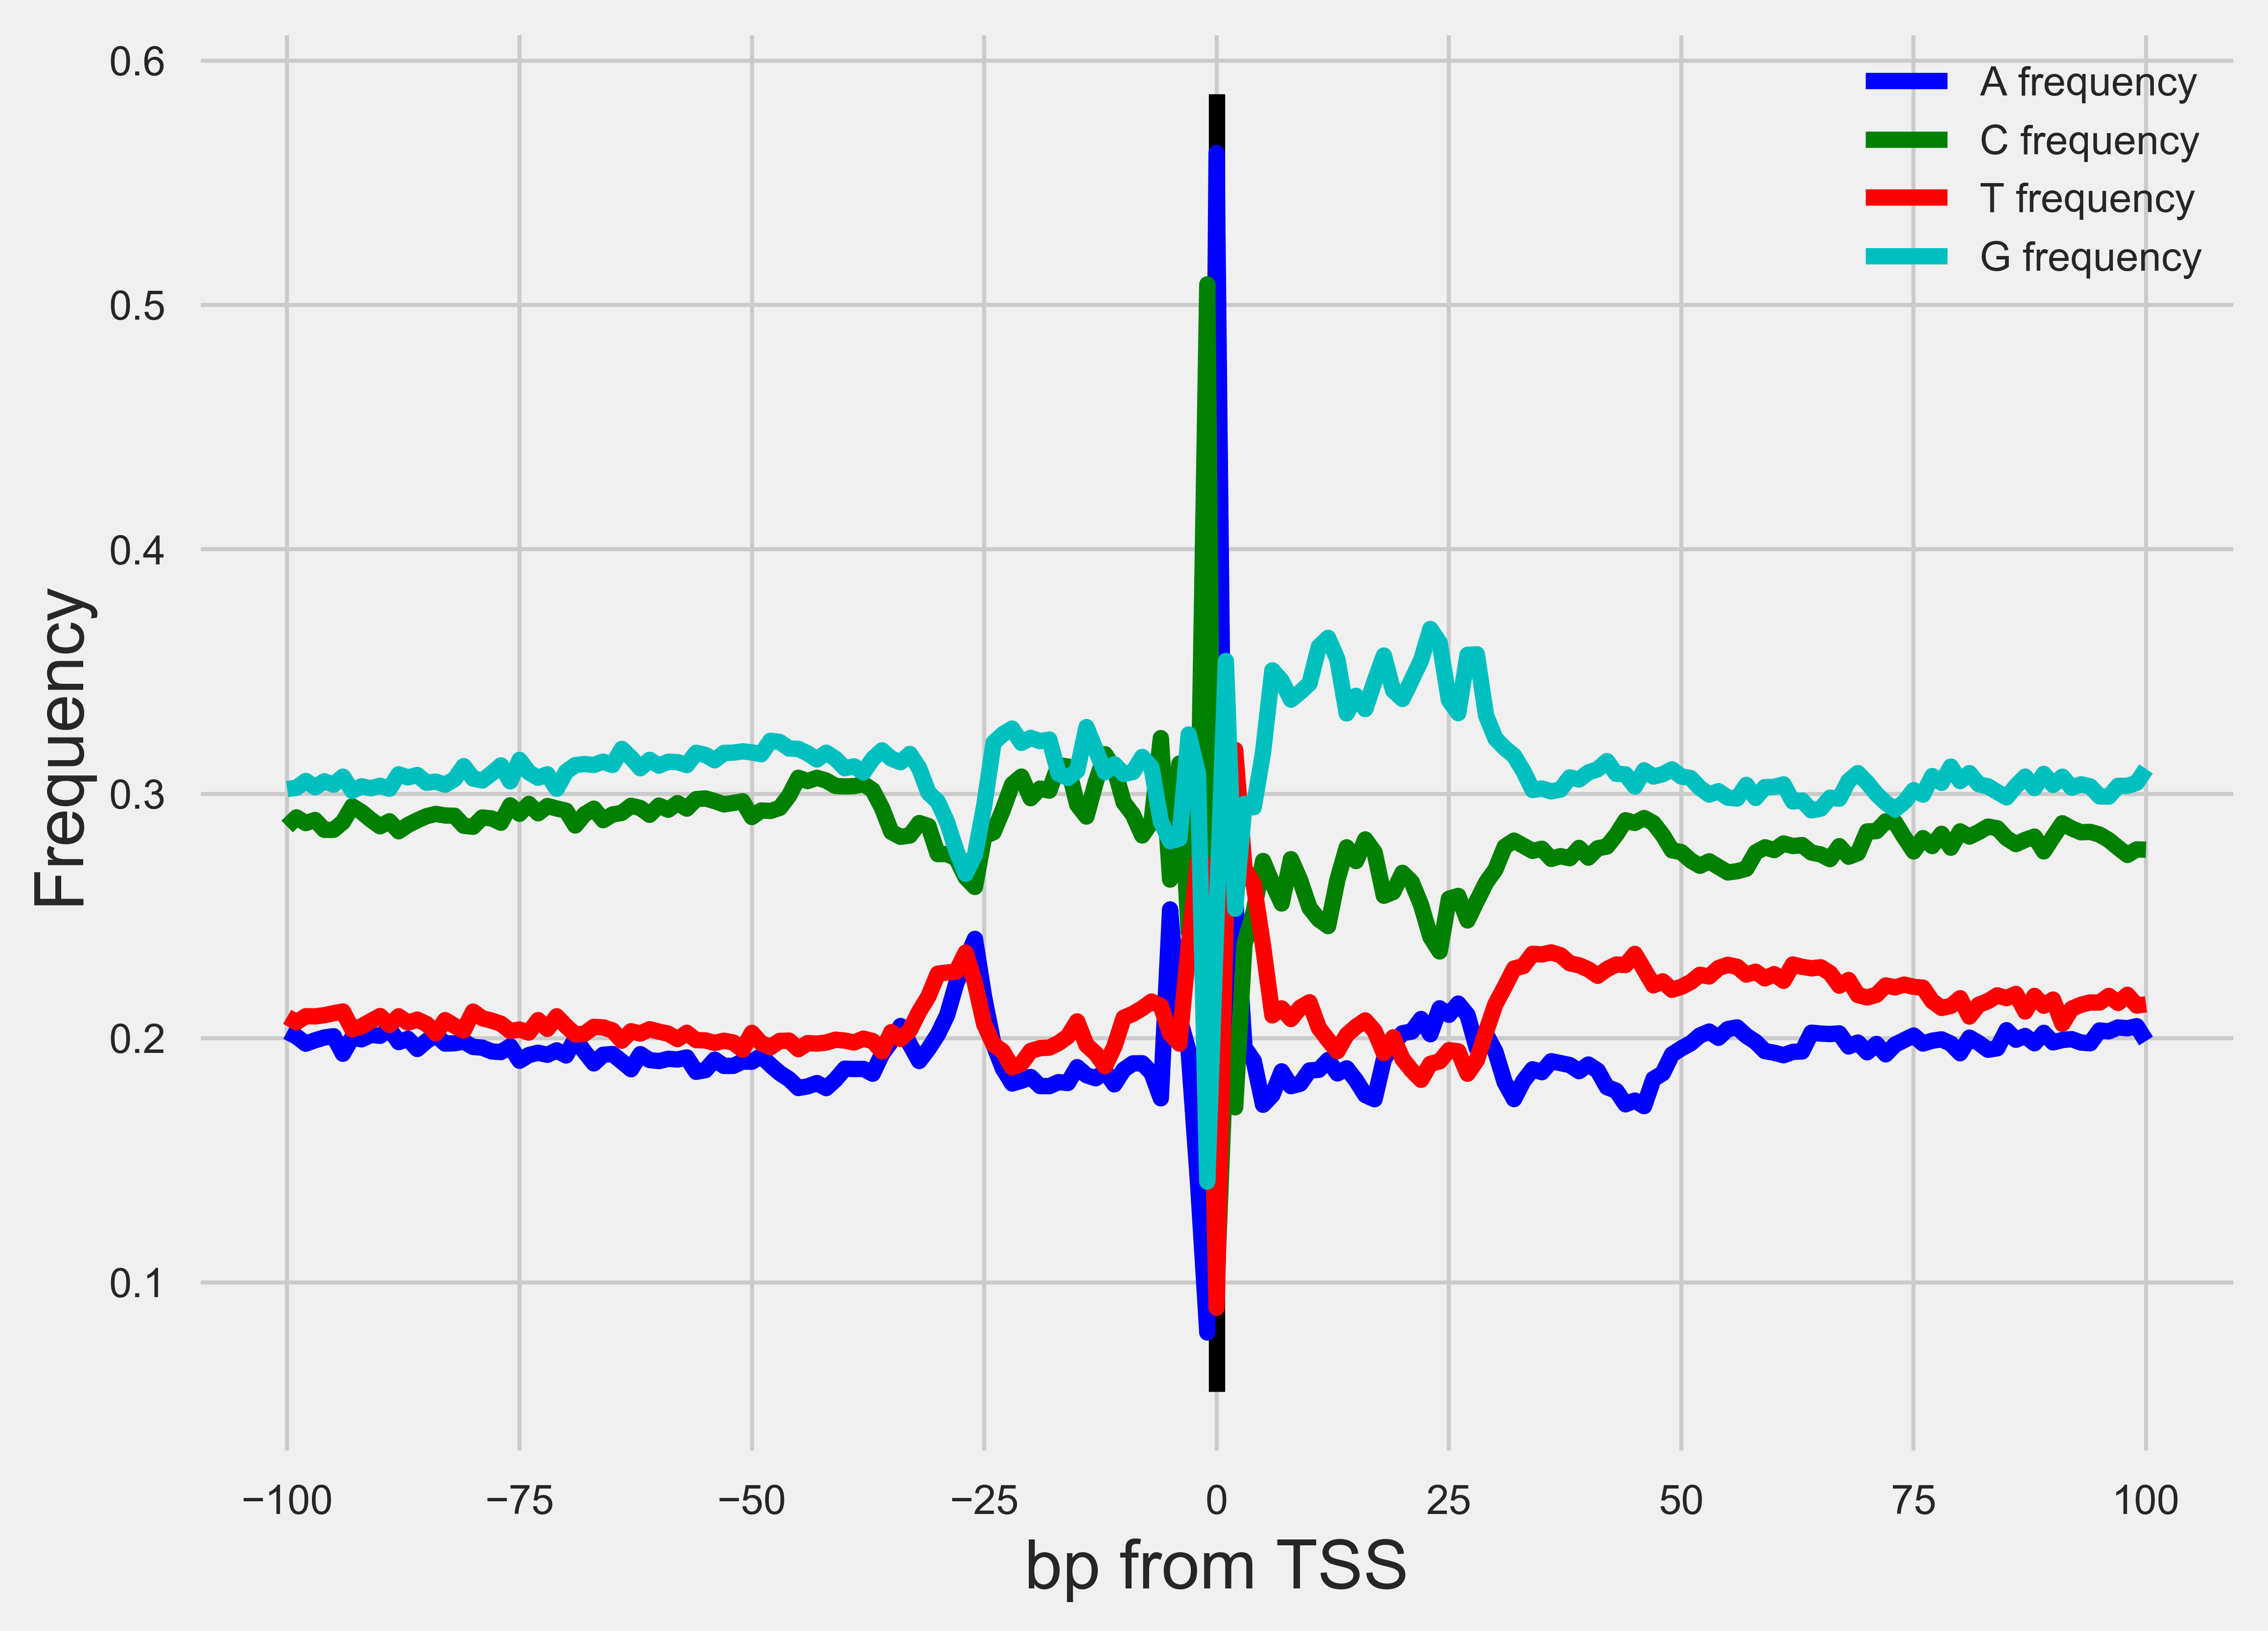

In [10]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

## ii. CHO-specific peaks and CHO-specific tags

annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt


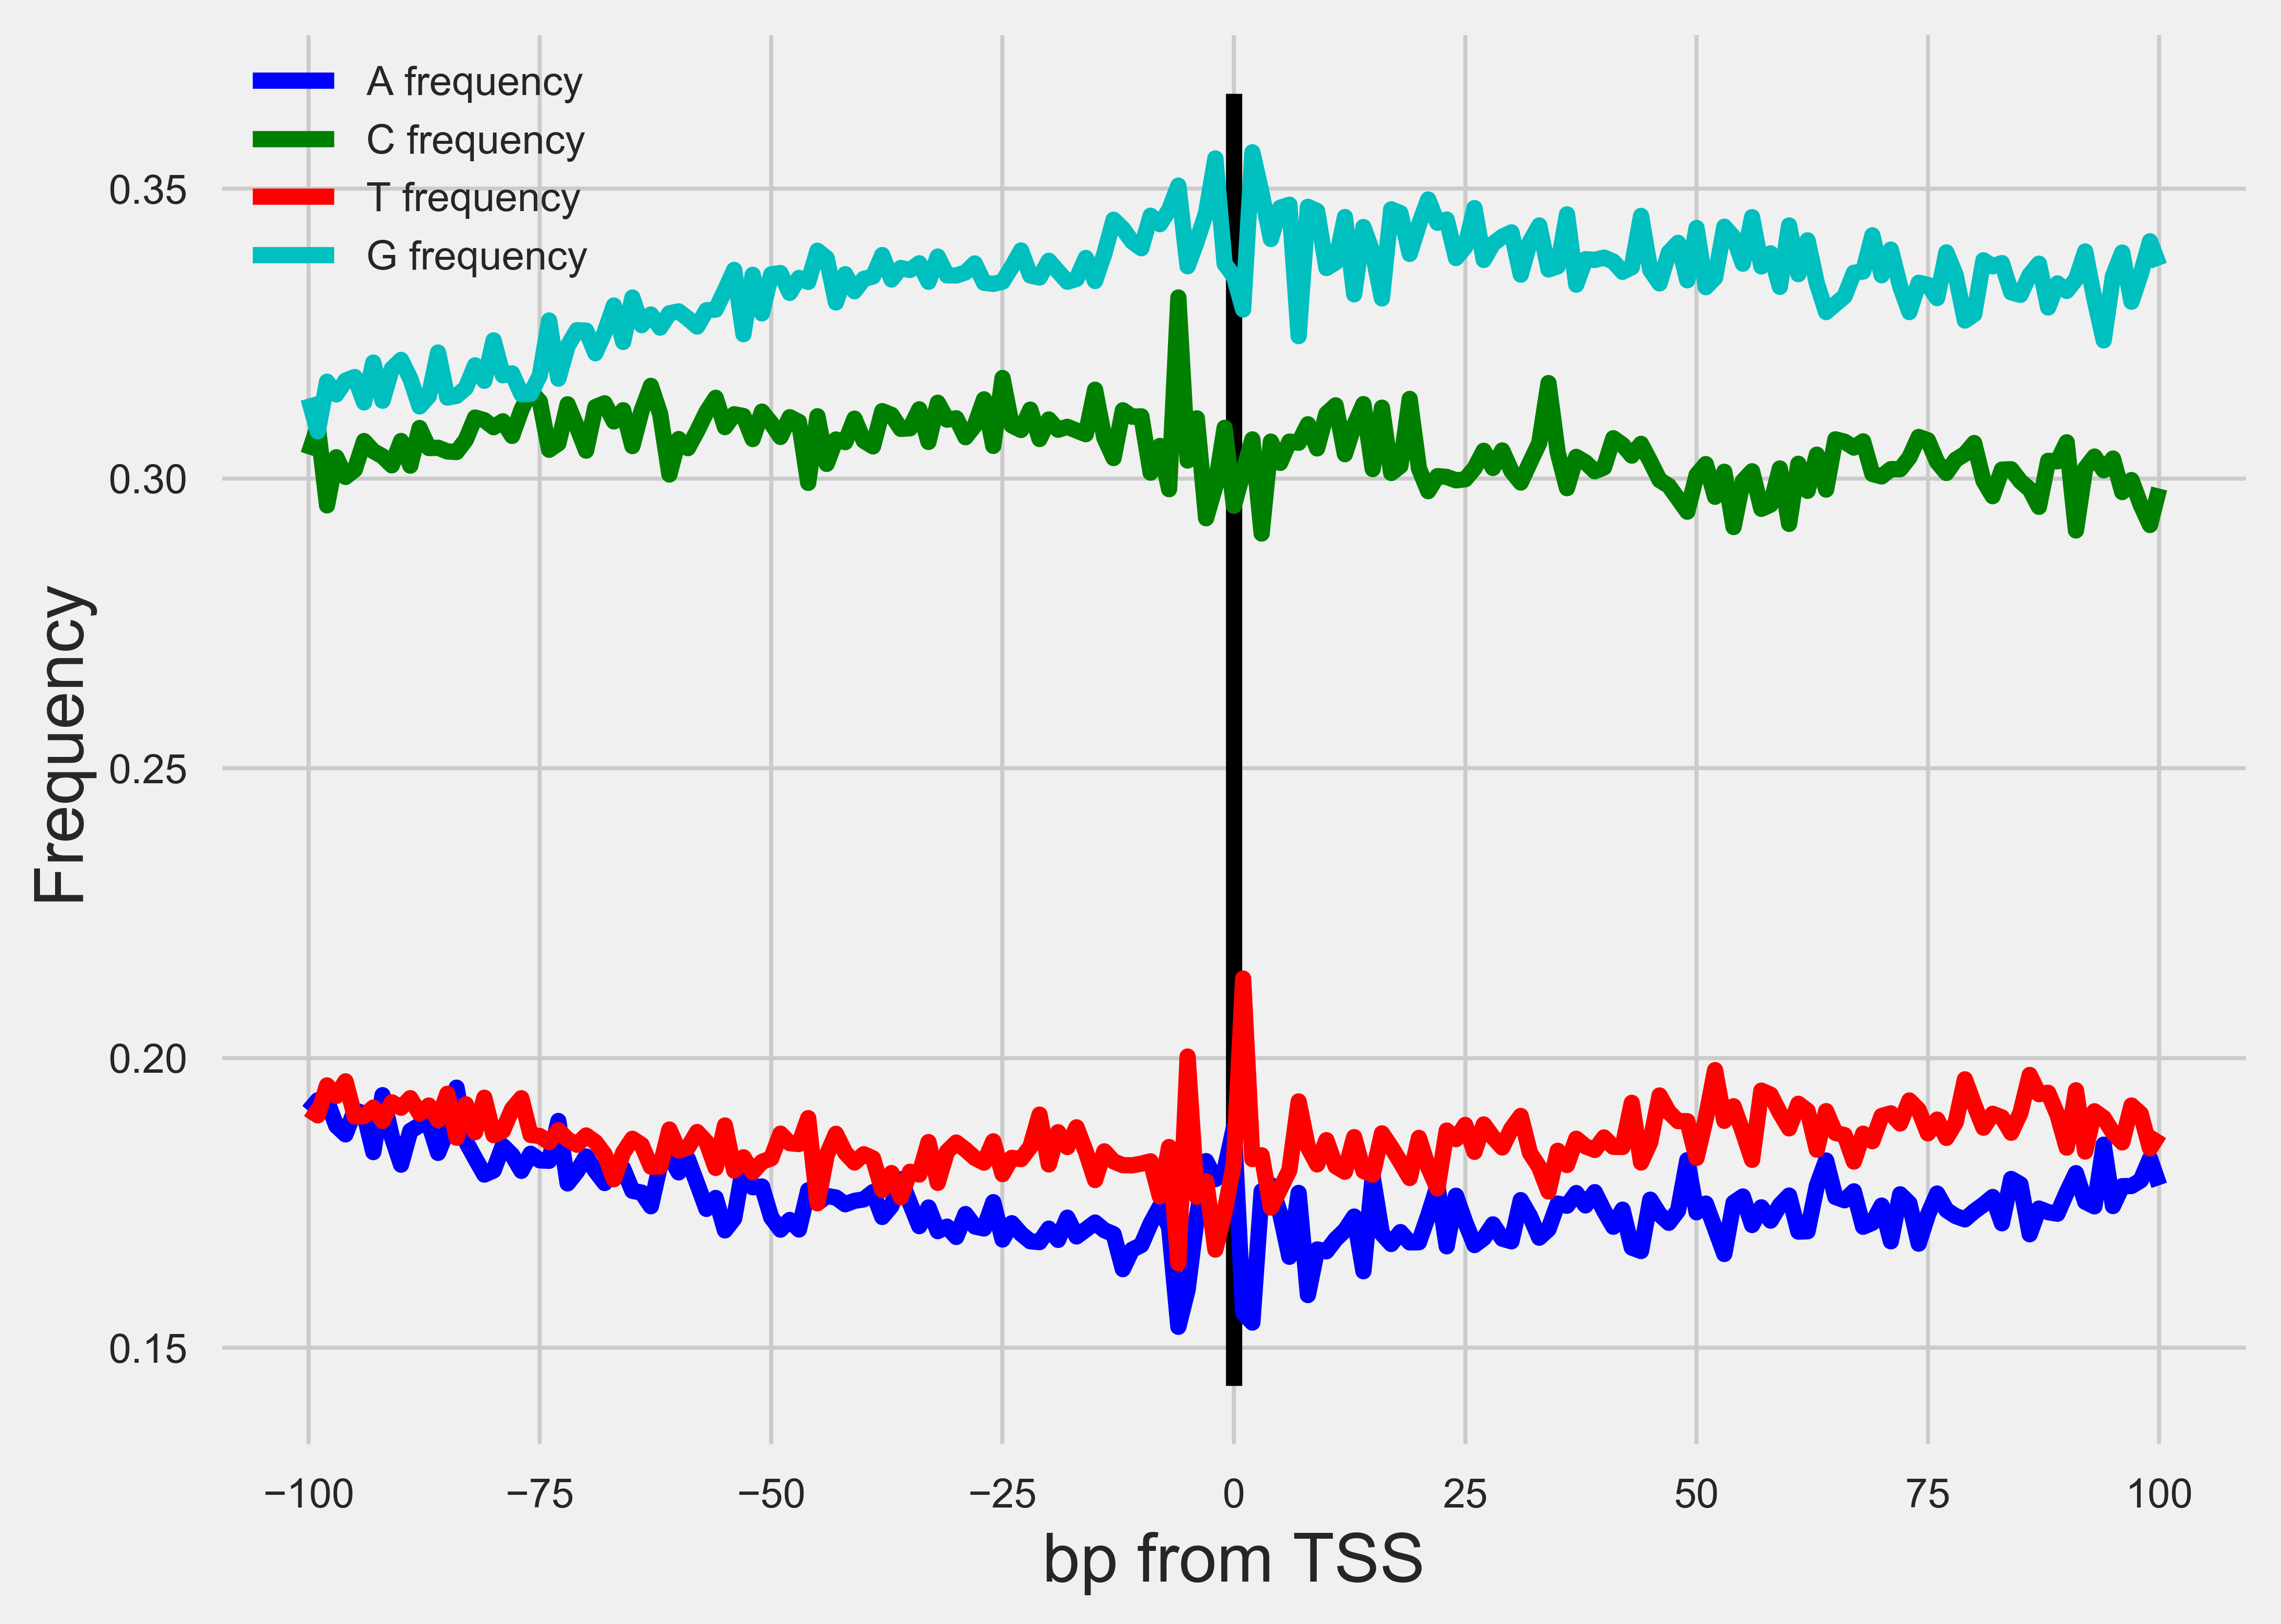

In [11]:
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt


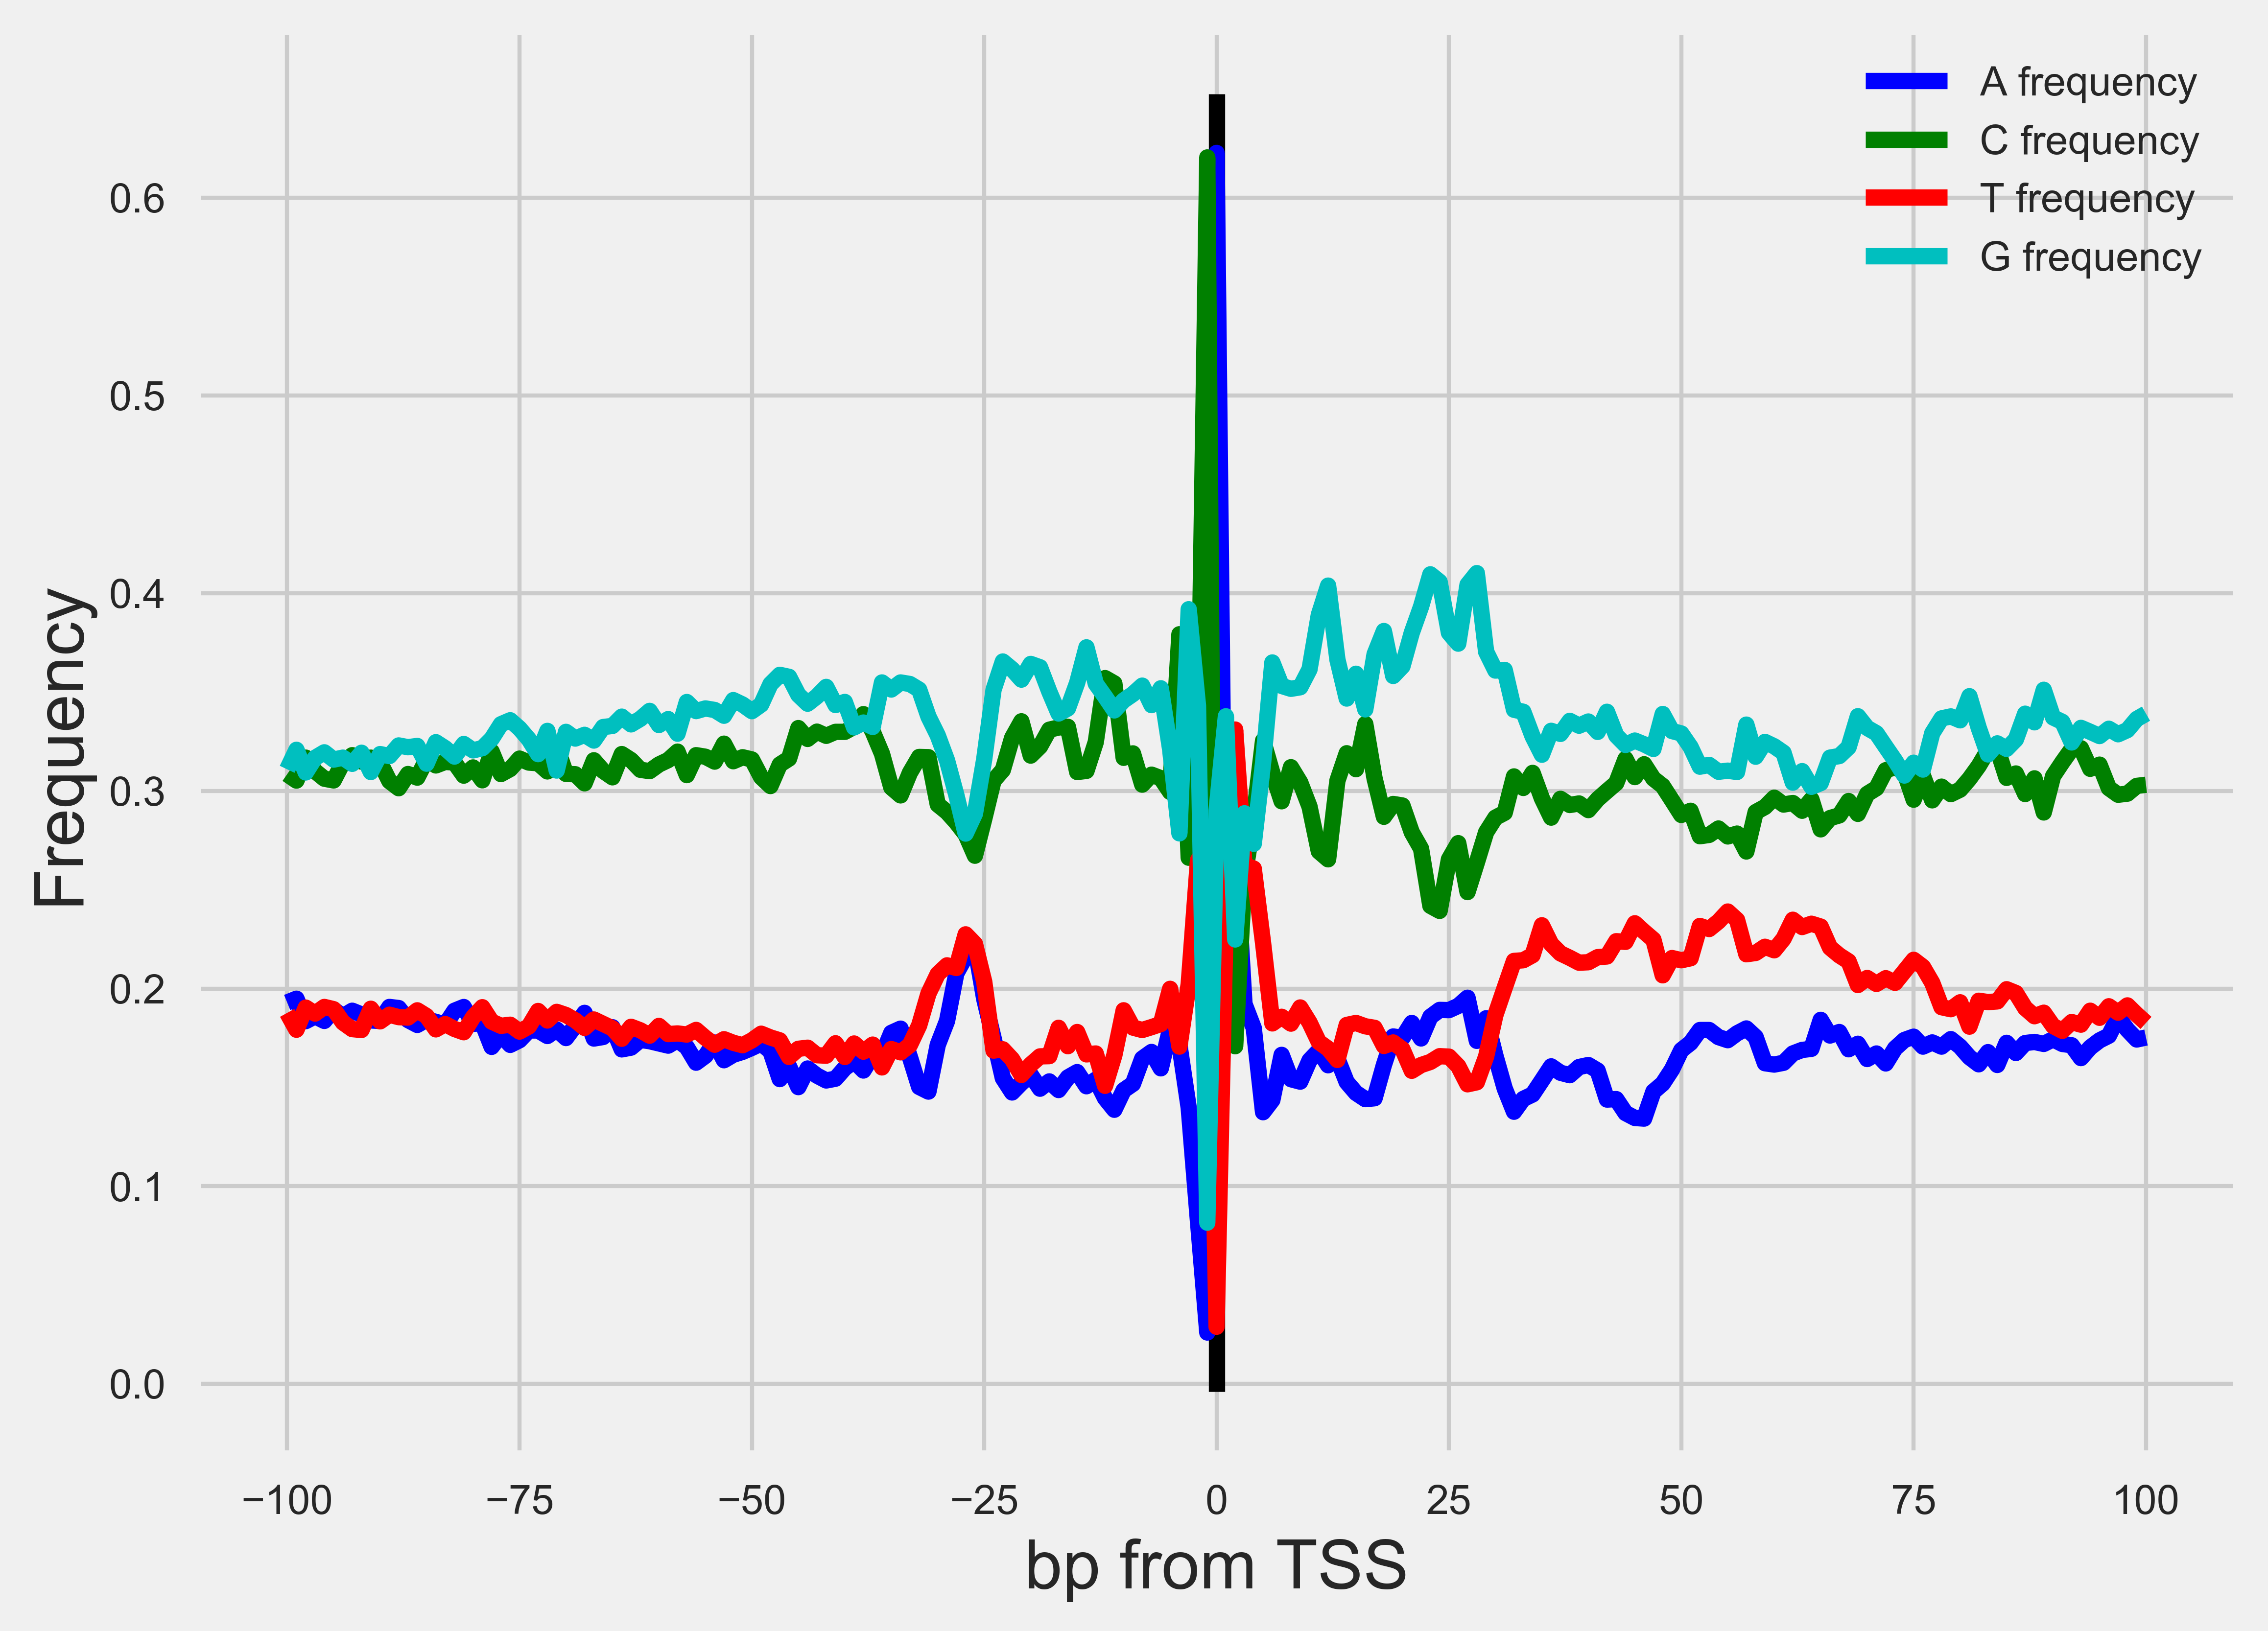

In [12]:
homer_nucleotide("Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv",
    'Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

------

------

------

------